In [6]:
import pandas as pd

In [7]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
police_killings = pd.read_csv("police_killings.csv",encoding ="ISO-8859-1")

In [9]:
pd.value_counts(police_killings["state_fp"])

6     74
48    47
12    29
4     25
40    22
13    16
36    13
8     12
34    11
53    11
22    11
17    11
39    10
29    10
24    10
37    10
26     9
45     9
51     9
41     8
18     8
1      8
42     7
21     7
20     6
27     6
28     6
31     6
47     6
25     5
49     5
55     5
35     5
16     4
15     4
5      4
32     3
30     2
19     2
2      2
54     2
10     2
33     1
9      1
11     1
23     1
56     1
dtype: int64

In [10]:
racegroup = police_killings["raceethnicity"].value_counts()
racegroup.shape

(6,)

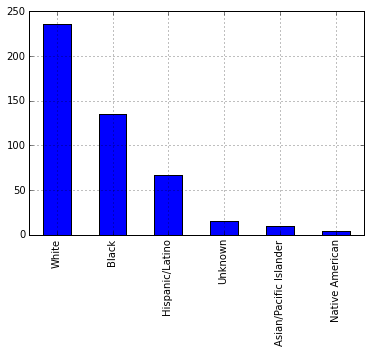

In [11]:
fig1=plt.Figure(figsize=(8,8))
rc1=fig1.add_subplot(1,1,1)

loc = np.arange(racegroup.shape[0])
racegroup.plot(kind = "bar")


In [13]:
police_killings.columns.values

array(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude',
       'state_fp', 'county_fp', 'tract_ce', 'geo_id', 'county_id',
       'namelsad', 'lawenforcementagency', 'cause', 'armed', 'pop',
       'share_white', 'share_black', 'share_hispanic', 'p_income',
       'h_income', 'county_income', 'comp_income', 'county_bucket',
       'nat_bucket', 'pov', 'urate', 'college'], dtype=object)

High white incidences compared to Black. This could be due to the highr % of population of whites

KeyError: "['p-income'] not in index"

In [13]:
income = police_killings[police_killings["p_income"]!='-']

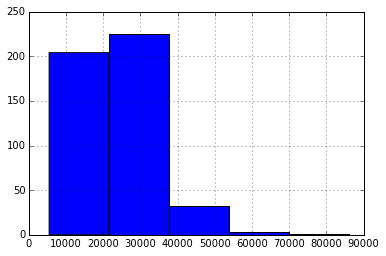

In [14]:
income["p_income"].astype(int).hist(bins = 5)

All killings happen for low income counties - median US income

In [22]:
state_pop = pd.read_csv("state_population.csv")

In [23]:
counts = pd.value_counts(police_killings["state_fp"])
counts

6     74
48    47
12    29
4     25
40    22
13    16
36    13
8     12
34    11
53    11
22    11
17    11
39    10
29    10
24    10
37    10
26     9
45     9
51     9
41     8
18     8
1      8
42     7
21     7
20     6
27     6
28     6
31     6
47     6
25     5
49     5
55     5
35     5
16     4
15     4
5      4
32     3
30     2
19     2
2      2
54     2
10     2
33     1
9      1
11     1
23     1
56     1
dtype: int64

In [24]:
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})

In [25]:
states = pd.merge(state_pop,states,on = "STATE")
states

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings
0,40,3,6,1,Alabama,4858979,3755483,77.3,8
1,40,4,9,2,Alaska,738432,552166,74.8,2
2,40,4,8,4,Arizona,6828065,5205215,76.2,25
3,40,3,7,5,Arkansas,2978204,2272904,76.3,4
4,40,4,9,6,California,39144818,30023902,76.7,74
5,40,4,8,8,Colorado,5456574,4199509,77.0,12
6,40,1,1,9,Connecticut,3590886,2826827,78.7,1
7,40,3,5,10,Delaware,945934,741548,78.4,2
8,40,3,5,11,District of Columbia,672228,554121,82.4,1
9,40,3,5,12,Florida,20271272,16166143,79.7,29


In [27]:
states["pop_millions"]=states["POPESTIMATE2015"]/1000000

In [28]:
states["rate"]=states["shootings"]/states["pop_millions"]

In [29]:
states.sort(columns = "rate", ascending = False)

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings,pop_millions,rate
35,40,3,7,40,Oklahoma,3911338,2950017,75.4,22,3.911338,5.624674
2,40,4,8,4,Arizona,6828065,5205215,76.2,25,6.828065,3.661359
27,40,2,4,31,Nebraska,1896190,1425853,75.2,6,1.896190,3.164240
11,40,4,9,15,Hawaii,1431603,1120770,78.3,4,1.431603,2.794071
1,40,4,9,2,Alaska,738432,552166,74.8,2,0.738432,2.708442
12,40,4,8,16,Idaho,1654930,1222093,73.8,4,1.654930,2.417021
31,40,4,8,35,New Mexico,2085109,1588201,76.2,5,2.085109,2.397956
18,40,3,7,22,Louisiana,4670724,3555911,76.1,11,4.670724,2.355095
5,40,4,8,8,Colorado,5456574,4199509,77.0,12,5.456574,2.199182
7,40,3,5,10,Delaware,945934,741548,78.4,2,0.945934,2.114312


connecticut and oklahoma are the states with least and most police killing per million people respectively

In [35]:
police_killings["state"]

0     AL
1     LA
2     WI
3     CA
4     OH
5     AZ
6     CA
7     CA
8     TX
9     MI
10    CA
11    CA
12    TX
13    IN
14    IN
...
452    NY
453    TX
454    CA
455    NY
456    VA
457    SC
458    TX
459    TX
460    AL
461    NJ
462    VA
463    WA
464    NC
465    CA
466    CA
Name: state, Length: 467, dtype: object

In [36]:
low_police_killings = police_killings[police_killings["state"].isin(["CT","PA","IA","NY","MA","NH","ME","IL","OH","WI"])]

In [38]:
high_police_killings = police_killings[police_killings["state"].isin(["OK","AZ","NE","HI","AK","ID","NM","LA","CO","DE"])]

In [40]:
low_police_killings.describe

<bound method DataFrame.describe of                      name      age  gender    raceethnicity     month  day  \
2             Aaron Siler       26    Male            White     March   14   
4            Adam Jovicic       29    Male            White     March   19   
26            Andrew Toto       54    Male            White   January   21   
31            Angelo West       41    Male            Black     March   27   
35       Anthony Gomez Jr       29    Male            Black       May   19   
44          Autumn Steele       34  Female            White   January    6   
53          Brandon Jones       18    Male            Black     March   19   
89          Dalton Branch       51    Male            Black       May   26   
102       Darrin Langford       32    Male            Black     April    2   
110         David Kassick       59    Male            White  February    2   
112          David Parker       58    Male            White     April   28   
113         David Schwalm   